In [1]:
import sklearn as skl
import pandas as pd
import numpy as np


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
#load data
df_all=pd.read_csv('output.csv')
df_ETF=pd.read_csv('outputETF.csv')
df_Future=pd.read_csv('outputFuture.csv')

In [11]:
#show the first five rows of the data
print(df_all.head())

   0  1  (147100, 147200, 147400, 148000, 152000)  \
0  1  1                           (0, 0, 0, 0, 0)   
1  0  2  (147100, 147200, 147400, 148000, 152200)   
2  1  2                 (147100, 147600, 0, 0, 0)   
3  0  3  (147100, 147200, 147300, 147400, 148000)   
4  1  3                 (147100, 147600, 0, 0, 0)   

     (1000, 3400, 1000, 2000, 1000)       (146900, 146600, 146300, 113000, 0)  \
0                   (0, 0, 0, 0, 0)                           (0, 0, 0, 0, 0)   
1   (9400, 12740, 4000, 2000, 1000)  (146900, 146600, 146300, 146000, 145400)   
2              (10, 10000, 0, 0, 0)                 (146900, 146400, 0, 0, 0)   
3  (10400, 12740, 2000, 4000, 2000)  (146300, 146000, 145400, 117200, 112900)   
4              (10, 10000, 0, 0, 0)                 (146900, 146400, 0, 0, 0)   

      (13000, 1000, 1000, 2000, 0)  0.1  0.2  0.3  0.4  -8600  
0                  (0, 0, 0, 0, 0)    0    0    0    0      0  
1  (13000, 1000, 1000, 2000, 1000)    0    0    0    0  11140  
2 

In [65]:
# add the new row of title to the data frame
#new_row={'instrument':1,'sequence_number':2,'ask_prices':3,'ask_volumes':4,'bid_prices':5,'bid_volumes':6,'bbbf':7,'bbaf':8,'bbbe':9,'bbae':10,'difference':11}
#1st order change:12,2nd order change: 13,3rd order change:14
#new_row=pd.Series([1,2,3,4,5,6,7,8,9,10,11],index=[
    #'instrument','sequence number','ask prices','ask volumes','bid prices','bid volumes','bbbf','bbaf','bbbe','bbae','difference'
    #])
#df_all=pd.concat([new_row,df_all],axis=0).reset_index(drop=True)
#print(df_all.head())

#how to add  a row on the head of a dataframe?

#get functions for standarlize the data
def get_mean(x):
    return sum(x)/len(x)
def get_std(x, mean):
    lst_sub_mean=[]
    for i in x:
        lst_sub_mean.append(i-mean)
    sum=0
    for i in lst_sub_mean:
        sum+=i**2
    result=(sum/len(x))**0.5
    return result
def normalization(x, mean, std):
    lst_sub_mean=[]
    for i in x:
        lst_sub_mean.append(i-mean)
    lst_result=[]
    for i in lst_sub_mean:
        lst_result.append(i/std)
    return lst_result

In [80]:
#add the output features and the market price
num_rows=df_all.shape[0]
lst_ask_prices=df_all.iloc[:,2]
#print(lst_ask_prices[1])
#print(type(lst_ask_prices[1]))
lst_lowest_ask_price=[]
for i in range(num_rows):
    tuple_row=eval(lst_ask_prices[i])
    none_zero_row=[]
    for i in tuple_row:
        if i>0:
            none_zero_row.append(i)
    if none_zero_row!=[]:
        lst_lowest_ask_price.append(min(none_zero_row))
    else:lst_lowest_ask_price.append(0)
#print(lst_lowest_ask_price)

lst_bid_prices=df_all.iloc[:,4]
lst_highest_bid_price=[]
for i in range(num_rows):
    tuple_row=eval(lst_bid_prices[i])
    lst_highest_bid_price.append(max(tuple_row))
#print(lst_highest_bid_price)
lst_market_price=[]
for i in range(num_rows):
    market_price=(lst_lowest_ask_price[i]+lst_highest_bid_price[i])/2
    lst_market_price.append(market_price)
#print(lst_market_price)
df_all['market price']=lst_market_price


In [82]:
print(df_all.head())

   0  1  (147100, 147200, 147400, 148000, 152000)  \
0  1  1                           (0, 0, 0, 0, 0)   
1  0  2  (147100, 147200, 147400, 148000, 152200)   
2  1  2                 (147100, 147600, 0, 0, 0)   
3  0  3  (147100, 147200, 147300, 147400, 148000)   
4  1  3                 (147100, 147600, 0, 0, 0)   

     (1000, 3400, 1000, 2000, 1000)       (146900, 146600, 146300, 113000, 0)  \
0                   (0, 0, 0, 0, 0)                           (0, 0, 0, 0, 0)   
1   (9400, 12740, 4000, 2000, 1000)  (146900, 146600, 146300, 146000, 145400)   
2              (10, 10000, 0, 0, 0)                 (146900, 146400, 0, 0, 0)   
3  (10400, 12740, 2000, 4000, 2000)  (146300, 146000, 145400, 117200, 112900)   
4              (10, 10000, 0, 0, 0)                 (146900, 146400, 0, 0, 0)   

      (13000, 1000, 1000, 2000, 0)  0.1  0.2  0.3  0.4  -8600  market price  \
0                  (0, 0, 0, 0, 0)    0    0    0    0      0           0.0   
1  (13000, 1000, 1000, 2000, 1000)  

In [81]:
lst_1order_market_change=[]
for i in range(num_rows-1):
    lst_1order_market_change.append(lst_market_price[i+1]-lst_market_price[i])
lst_1order_market_change.append(0)
df_all['1 order market change']=lst_1order_market_change

lst_2order_market_change=[]
for i in range(num_rows-2):
    lst_2order_market_change.append(lst_market_price[i+2]-lst_market_price[i])
lst_2order_market_change.extend([0,0])
df_all['2 order market change']=lst_2order_market_change

lst_3order_market_change=[]
for i in range(num_rows-3):
    lst_3order_market_change.append(lst_market_price[i+3]-lst_market_price[i])
lst_3order_market_change.extend([0,0,0])
df_all['3 order market change']=lst_3order_market_change


In [83]:
#standarlize the data and put the standalized data to a new dataframe
#print(df_all.iloc[1,0])
standarlized_ETF=pd.DataFrame()
lst_seq_n=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        lst_seq_n.append(df_all.iloc[i,1])
standarlized_ETF['sequence number']=lst_seq_n

lst_a1=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,2])
        lst_a1.append(tuple_row[0])
# mean_a1=get_mean(lst_a1)
# std_a1=get_std(lst_a1,mean_a1)
# nor_a1=normalization(lst_a1,mean_a1,std_a1)
standarlized_ETF['a1']=lst_a1

lst_a2=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,2])
        lst_a2.append(tuple_row[1])
# mean_a2=get_mean(lst_a2)
# std_a2=get_std(lst_a2,mean_a2)
# nor_a2=normalization(lst_a2,mean_a2,std_a2)
standarlized_ETF['a2']=lst_a2

lst_a3=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,2])
        lst_a3.append(tuple_row[2])
# mean_a3=get_mean(lst_a3)
# std_a3=get_std(lst_a3,mean_a3)
# nor_a3=normalization(lst_a3,mean_a3,std_a3)
standarlized_ETF['a3']=lst_a3

lst_a4=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,2])
        lst_a4.append(tuple_row[3])
# mean_a4=get_mean(lst_a4)
# std_a4=get_std(lst_a4,mean_a4)
# nor_a4=normalization(lst_a4,mean_a4,std_a4)
standarlized_ETF['a4']=lst_a4

lst_a5=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,2])
        lst_a5.append(tuple_row[4])
# mean_a5=get_mean(lst_a5)
# std_a5=get_std(lst_a5,mean_a5)
# nor_a5=normalization(lst_a5,mean_a5,std_a5)
standarlized_ETF['a5']=lst_a5

lst_b1=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,3])
        lst_b1.append(tuple_row[0])
# mean_b1=get_mean(lst_b1)
# std_b1=get_std(lst_b1,mean_b1)
# nor_b1=normalization(lst_b1,mean_b1,std_b1)
standarlized_ETF['b1']=lst_b1

lst_b2=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,3])
        lst_b2.append(tuple_row[1])
'''mean_b2=get_mean(lst_b2)
std_b2=get_std(lst_b2,mean_b2)
nor_b2=normalization(lst_b2,mean_b2,std_b2)'''
standarlized_ETF['b2']=lst_b2

lst_b3=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,3])
        lst_b3.append(tuple_row[2])
'''mean_b3=get_mean(lst_b3)
std_b3=get_std(lst_b3,mean_b3)
nor_b3=normalization(lst_b3,mean_b3,std_b3)'''
standarlized_ETF['b3']=lst_b3

lst_b4=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,3])
        lst_b4.append(tuple_row[3])
'''mean_b4=get_mean(lst_b4)
std_b4=get_std(lst_b4,mean_b4)
nor_b4=normalization(lst_b4,mean_b4,std_b4)'''
standarlized_ETF['b4']=lst_b4

lst_b5=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        tuple_row=eval(df_all.iloc[i,3])
        lst_b5.append(tuple_row[4])
'''mean_b5=get_mean(lst_b5)
std_b5=get_std(lst_b5,mean_b5)
nor_b5=normalization(lst_b5,mean_b5,std_b5)'''
standarlized_ETF['b5']=lst_b5

lst_difference=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        lst_difference.append(df_all.iloc[i,10])
standarlized_ETF['difference']=lst_difference

lst_market_price=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        #print(df_all.iloc[i,11])
        lst_market_price.append(df_all.iloc[i,11])
standarlized_ETF['market price']=lst_market_price

lst_1st_change=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        lst_1st_change.append(df_all.iloc[i,12])
standarlized_ETF['1st change']=lst_1st_change

lst_2nd_change=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        lst_2nd_change.append(df_all.iloc[i,13])
standarlized_ETF['2nd change']=lst_2nd_change

lst_3rd_change=[]
for i in range(num_rows):
    if df_all.iloc[i,0]==1:
        lst_3rd_change.append(df_all.iloc[i,14])
standarlized_ETF['3rd change']=lst_3rd_change

print(standarlized_ETF.head())


   sequence number      a1      a2  a3  a4  a5     b1     b2  b3  b4  b5  \
0                1       0       0   0   0   0      0      0   0   0   0   
1                2  147100  147600   0   0   0     10  10000   0   0   0   
2                3  147100  147600   0   0   0     10  10000   0   0   0   
3                4  147100  147600   0   0   0     10  10000   0   0   0   
4                5  147600       0   0   0   0  10000      0   0   0   0   

   difference  market price  1st change  2nd change  3rd change  
0           0           0.0    147000.0    147000.0    146700.0  
1           0      147000.0      -300.0         0.0        50.0  
2           0      147000.0        50.0      -250.0        50.0  
3           0      146750.0       300.0       550.0       400.0  
4         -10      147300.0      -150.0       150.0      -250.0  


In [98]:
#establish the feature matrix and output matrix
array_a1=np.array(lst_a1)
array_input=np.array(lst_a1)
array_a2=np.array(lst_a2)
array_a3=np.array(lst_a3)
array_a4=np.array(lst_a4)
array_a5=np.array(lst_a5)
array_b1=np.array(lst_b1)
array_b2=np.array(lst_b2)
array_b3=np.array(lst_b3)
array_b4=np.array(lst_b4)
array_b5=np.array(lst_b5)
array_difference=np.array(lst_difference)

#print(np.reshape(array_a1,(-1,1)).shape)
array_input=np.reshape(array_input,(-1,1))
#print(array_input.shape)
array_input=np.append(array_input,np.reshape(array_a1,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_a2,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_a3,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_a4,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_a5,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_b1,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_b2,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_b3,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_b4,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_b5,(-1,1)),axis=1)
array_input=np.append(array_input,np.reshape(array_difference,(-1,1)),axis=1)
#print(array_input)

#get the output array
array_output=np.array(lst_market_price)
array_output=np.reshape(array_output,(-1,1))
array_1st_change=np.array(lst_1st_change)
array_2nd_change=np.array(lst_2nd_change)
array_3rd_change=np.array(lst_3rd_change)
array_output=np.append(array_output,np.reshape(array_1st_change,(-1,1)),axis=1)
array_output=np.append(array_output,np.reshape(array_2nd_change,(-1,1)),axis=1)
array_output=np.append(array_output,np.reshape(array_3rd_change,(-1,1)),axis=1)

#get the output array for market price
array_output_market=np.array(lst_market_price)

In [84]:
#the correlation matrix of the variables in the dataframe
corr_matrix=standarlized_ETF.corr()
print(corr_matrix)

                 sequence number        a1        a2        a3        a4  \
sequence number         1.000000  0.443608  0.264545  0.253883  0.253500   
a1                      0.443608  1.000000  0.472232  0.411093  0.380318   
a2                      0.264545  0.472232  1.000000  0.814862  0.711021   
a3                      0.253883  0.411093  0.814862  1.000000  0.865063   
a4                      0.253500  0.380318  0.711021  0.865063  1.000000   
a5                      0.264370  0.343933  0.572255  0.687423  0.786508   
b1                      0.076159  0.062478 -0.034897 -0.016351 -0.004035   
b2                     -0.005483 -0.010740  0.021472 -0.022805 -0.054981   
b3                     -0.107620 -0.022313  0.010250  0.019657  0.025491   
b4                     -0.132518 -0.007876  0.011769  0.017063  0.022101   
b5                     -0.089632 -0.025475 -0.000751  0.004821  0.009710   
difference             -0.015895  0.002028  0.003263  0.006543  0.008304   
market price

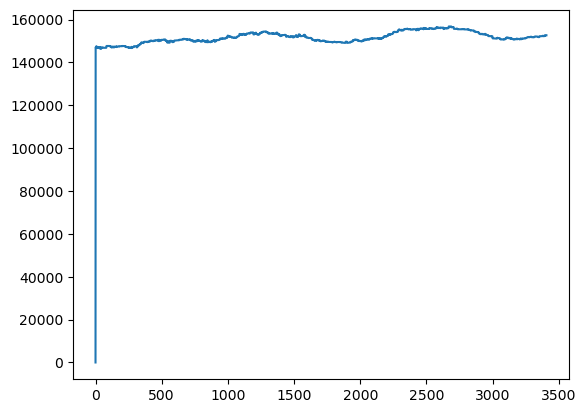

In [86]:
#visualize the market price
import matplotlib.pyplot as plt
lst=[i for i in range(len(lst_market_price))]
plt.plot(lst,lst_market_price)

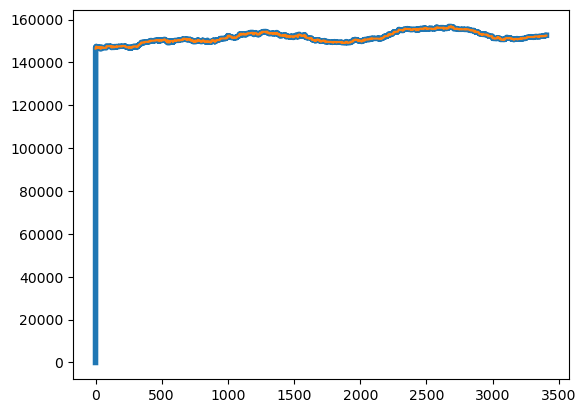

In [102]:
#train the gradient boosting regresor model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test=train_test_split(array_input,array_output_market)

gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=120)
gbrt.fit(X_train,y_train)

errors=[mean_squared_error(y_test,y_pred) for y_pred in gbrt.staged_predict(X_test)]
best_n_estimator=np.argmin(errors)+1

gbrt_best=GradientBoostingRegressor(max_depth=2,n_estimators=best_n_estimator)
gbrt_best.fit(X_train,y_train)

plt.plot(lst,lst_market_price,linewidth=4)
plt.plot(lst,gbrt.predict(array_input))
plt.show()


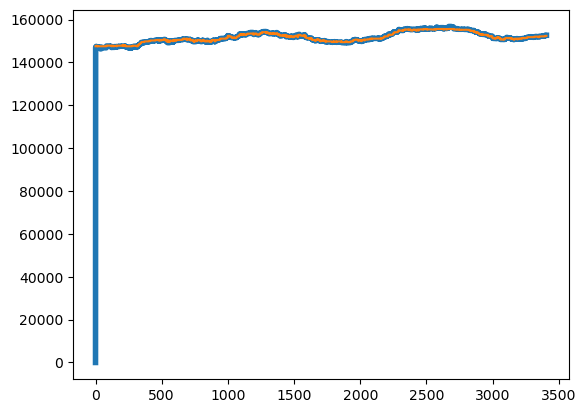

In [121]:
#reduce the number of estimators and get a more practical solution
gbrt_practical=GradientBoostingRegressor(max_depth=2,n_estimators=25)
gbrt_practical.fit(X_train,y_train)

plt.plot(lst,lst_market_price,linewidth=4)
plt.plot(lst,gbrt_practical.predict(array_input))
plt.show()


In [117]:
from sklearn.tree import DecisionTreeRegressor, export_text
#get the parameters of the model
#print(gbrt_best.estimators_)
print(type(gbrt_best.estimators_[0][0]))
print(export_text(gbrt_best.estimators_[0][0]))

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
|--- feature_1 <= 152150.00
|   |--- feature_4 <= 149600.00
|   |   |--- value: [-4340.02]
|   |--- feature_4 >  149600.00
|   |   |--- value: [-1186.40]
|--- feature_1 >  152150.00
|   |--- feature_1 <= 154350.00
|   |   |--- value: [1246.43]
|   |--- feature_1 >  154350.00
|   |   |--- value: [3839.93]

